In [1]:
import csv, os, glob, torch, time
from dataloader.dataset import UnlabeledDataset2, UnlabeledTransform2
import torch.utils.data as data
from utils.module import EarlyStopping
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import numpy as np

In [36]:
# ラベルなしデータのpred, varをプロット
image_path = sorted(glob.glob('data/Train/images/Volker*'))
anno_path = sorted(glob.glob('data/Train/masks/Volker*'))
pred_mean1_path = sorted(glob.glob('data/unlabeled_mask/231128_iter1/pred_mean_corrected/*'))
pred_var1_path = sorted(glob.glob('data/unlabeled_mask/231128_iter1/pred_var/*'))

In [37]:
# 同じ順序を保ったままランダムにシャッフル
combined = list(zip(image_path, anno_path, pred_mean1_path, pred_var1_path))
np.random.shuffle(combined)

# シャッフルされた配列を元に戻す
image_path, anno_path, pred_mean1_path, pred_var1_path = zip(*combined)

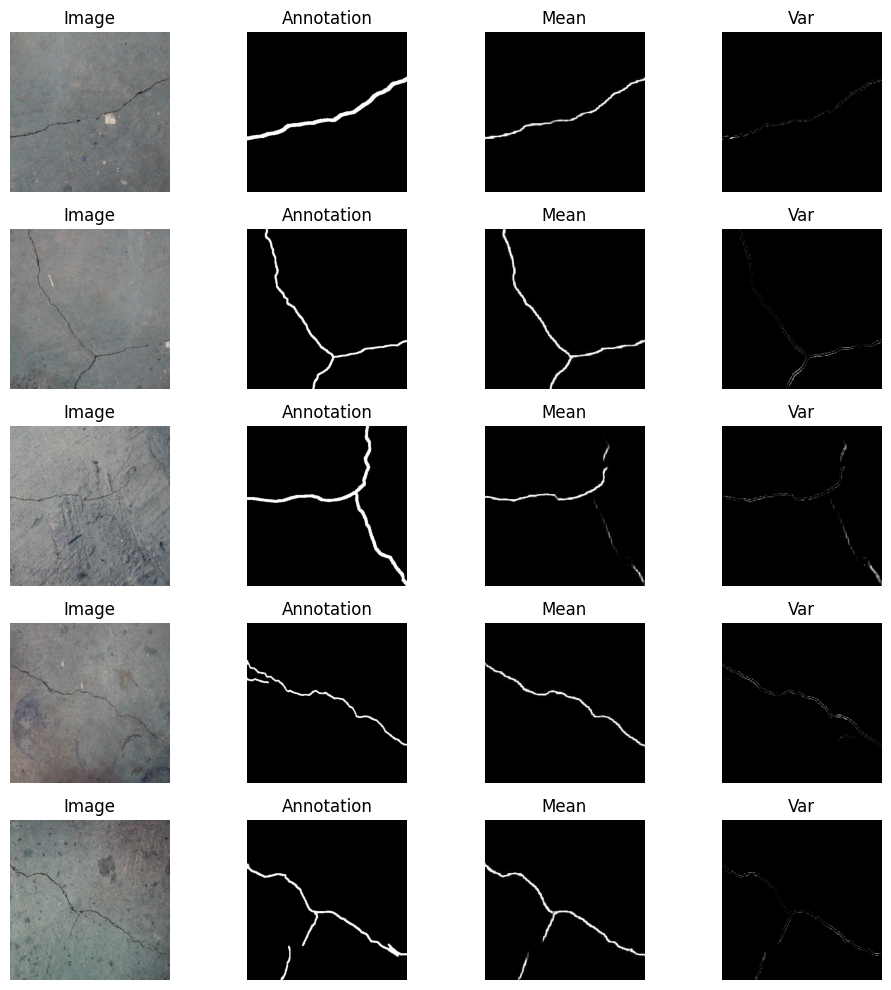

In [45]:
# 画像の表示
fig, axes = plt.subplots(5, 4, figsize=(10,10))

for i in range(5):
    j = i+15
    image = plt.imread(image_path[j])
    anno = plt.imread(anno_path[j])
    pred_mean1 = plt.imread(pred_mean1_path[j])
    pred_var1 = torch.load(pred_var1_path[j])

    # Image
    axes[i, 0].imshow(image)
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image')

    # Annotation
    axes[i, 1].imshow(anno)
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Annotation')

    # Mean
    axes[i, 2].imshow(pred_mean1, cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Mean')

    # Var
    axes[i, 3].imshow(pred_var1, cmap='gray')
    axes[i, 3].axis('off')
    axes[i, 3].set_title('Var')

plt.tight_layout()
plt.show()

In [24]:
# ソース（変換前）、ソース（変換後）、アノテーションをプロット
sourceb_path = sorted(glob.glob('data/Test/images/[!Rissbilder]*'))
sourcea_path = sorted(glob.glob('data/Test_transform2/images/[!Rissbilder]*'))
anno_path = sorted(glob.glob('data/Test/masks/[!Rissbilder]*'))

In [25]:
# 同じ順序を保ったままランダムにシャッフル
combined = list(zip(sourceb_path, sourcea_path, anno_path))
np.random.shuffle(combined)

# シャッフルされた配列を元に戻す
sourceb_path, sourcea_path, anno_path = zip(*combined)

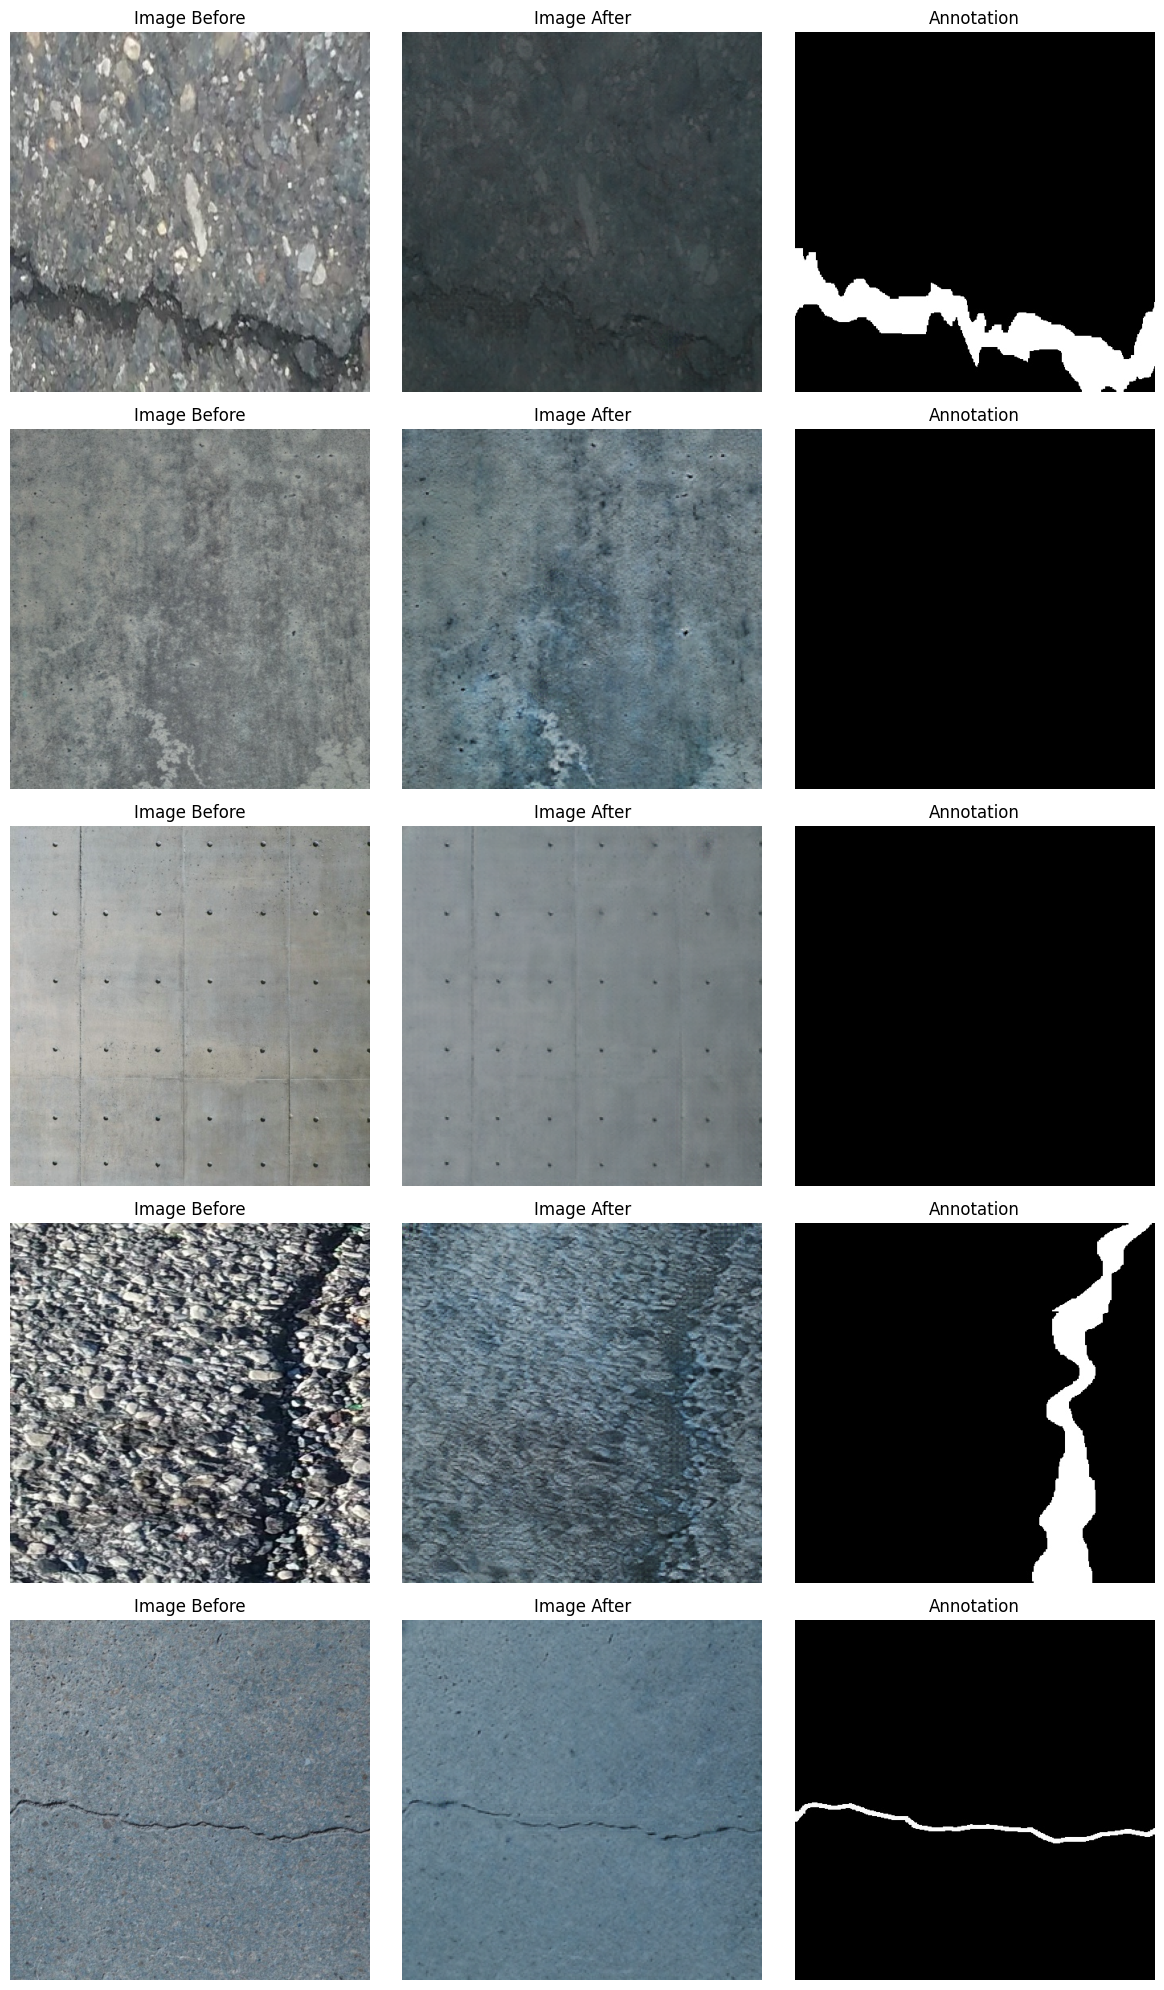

In [29]:
# 画像の表示
fig, axes = plt.subplots(5, 3, figsize=(12, 20))

for i in range(5):
    j = i + 10
    image1 = plt.imread(sourceb_path[j])
    image2 = plt.imread(sourcea_path[j])
    anno = plt.imread(anno_path[j])


    # Image
    axes[i, 0].imshow(image1)
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Image Before')
    
    # Image
    axes[i, 1].imshow(image2)
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Image After')

    # Annotation
    axes[i, 2].imshow(anno, cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Annotation')


plt.tight_layout()
plt.show()